## Dynamic Programming

```
those who cannot remember the past are condemned to repeat it.
```

In [ ]:
# fibonacci series

# naive recursive implementation
def fibonacci(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

print(5)

# Time complexity: O(2^n)
# Space complexity: O(n) due to recursion stack

5


problem with recursion is that it can be inefficient for problems with overlapping subproblems

ex - 
```
       fib(5)
       /    \
    fib(4)   fib(3)
    /    \       / \
fib(3) fib(2) fib(2) fib(1)
/     \       /     \
fib(2) fib(1) fib(1) fib(0)
```

as we can see fib(2) and fib(1) are computed multiple times, we can store the results in map/table and reuse them when needed

In [ ]:
# memoization implementation

def fibonacci_memo(n, dp):
    # check if the result is already computed
    # and stored in the dp array 
    if dp[n] != -1:
        return dp[n]
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    else:
        dp[n] = fibonacci_memo(n - 1, dp) + fibonacci_memo(n - 2, dp)
        return dp[n]
    
dp = [-1] * 6
print(fibonacci_memo(5, dp))

# Time complexity: O(n)
# Space complexity: O(n) for memoization storage

5


if we travel in bottom-up manner, we can avoid recursion altogether, this is called tabulation, it can help us optimize space complexity by reducing the stack space used by recursion

In [ ]:
# tabulation implementation

def fibonacci_tab(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    
    fib = [0] * (n + 1)
    fib[1] = 1
    
    for i in range(2, n + 1):
        fib[i] = fib[i - 1] + fib[i - 2]
    
    return fib[n]

print(fibonacci_tab(5))

# Time complexity: O(n)
# Space complexity: O(n) for the array

In [4]:
# space optimized tabulation implementation

def fibonacci_space_optimized(n):
    if n <= 0:
        return 0
    elif n == 1:
        return 1
    
    prev2 = 0
    prev1 = 1
    
    for i in range(2, n + 1):
        current = prev1 + prev2
        prev2 = prev1
        prev1 = current
    
    return prev1

print(fibonacci_space_optimized(5))

# Time complexity: O(n)
# Space complexity: O(1) since we are using only a constant amount of space

5


so, recursion --> memoization --> tabulation --> space optimization

### 1D DP

In [ ]:
# 1. climbing stairs

# recursion

def climbStairs(n):
    if n==2 or n==1:
        return n

    return climbStairs(n-1) + climbStairs(n-2)

# T.C = O(2^n)
# S.C = O(n)

In [ ]:
# memoization

def solve(i, dp):
    if i<=2:
        return i

    if dp[i]!=-1:
        return dp[i]

    dp[i]= solve(i-1, dp) + solve(i-2, dp)
    return dp[i]

# T.C = O(n)
# S.C = 0(n)

In [ ]:
# tabulation

def climbStairs(n):
    if n<=2:
        return n
    dp= [-1] * (n+1)
    dp[1], dp[2]= 1, 2
    for i in range(3, n+1):
        dp[i]= dp[i-1] + dp[i-2]
    return dp[n]

# T.C = O(n)
# no recursion stack space

In [ ]:
# space optimization

def climbStairs(n):
    if n<=2:
        return n
    prev1, prev2, curr= 2, 1, -1
    for _ in range(3, n+1):
        curr= prev1 + prev2
        prev2= prev1
        prev1= curr
    return curr

# T.C = O(n)
# S.C = O(1)


In [ ]:
# 2. frog jump

# recursion

import sys
def solve(i, height):
    if i==len(height)-1:
        return 0
    way1, way2= sys.maxsize, sys.maxsize
    if i+1<=len(height)-1:
        way1= abs(height[i+1]-height[i]) + solve(i+1, height)
    if i+2<=len(height)-1:
        way2= abs(height[i+2]-height[i]) + solve(i+2, height)
    return min(way1, way2)
        
        
def minCost(height):
    return solve(0, height)


In [ ]:
# memoization

def solve(i, height, dp):
    if i==len(height)-1:
        return 0
        
    if dp[i]!=-1:
        return dp[i]
        
    way1, way2= sys.maxsize, sys.maxsize
    if i+1<=len(height)-1:
        way1= abs(height[i+1]-height[i]) + solve(i+1, height, dp)
    if i+2<=len(height)-1:
        way2= abs(height[i+2]-height[i]) + se.solve(i+2, height, dp)
    
        
    dp[i]= min(way1, way2)
    return dp[i]
        
        
def minCost(height):
    n= len(height)
    dp= [-1] * n
    return solve(0, height, dp)

In [ ]:
# tabulation

def minCost(height):
    n= len(height)
    dp= [-1] * n
    dp[n-1]= 0
    for i in range(n-2, -1, -1):
        way1, way2= sys.maxsize, sys.maxsize
        if i+1<=n-1:
            way1= abs(height[i+1]-height[i]) + dp[i+1]
        if i+2<=n-1:
            way2= abs(height[i+2]-height[i]) + dp[i+2]
        dp[i]= min(way1, way2)
    return dp[0]

In [ ]:
# 3. frog jumps with k distance

# recursion

def solve(i, heights, k):
    n= len(heights)
    if i==n-1:
        return 0

    mini= sys.maxsize
    for j in range(i+1, i+k+1):
        if j<=n-1:
            mini= min(mini, abs(heights[j]-heights[i]) + solve(j, heights, k))
    return mini

def frogJump(heights, k):
    return solve(0, heights, k)

In [ ]:
# memoization

def solve(i, heights, k, dp):
    n= len(heights)
    if i==n-1:
        return 0

    if dp[i]!=-1:
        return dp[i]

    mini= sys.maxsize
    for j in range(i+1, i+k+1):
        if j<=n-1:
            mini= min(mini, abs(heights[j]-heights[i]) + solve(j, heights, k, dp))
    dp[i]= mini
    return dp[i]

def frogJump( heights, k):
    n= len(heights)
    dp= [-1] * n
    return solve(0, heights, k, dp)

In [ ]:
# tabulation

def frogJump(heights, k):
    n= len(heights)
    dp= [-1] * n
    dp[n-1]= 0
    for i in range(n-2, -1, -1):
        mini= sys.maxsize
        for j in range(i+1, i+k+1):
            if j<=n-1:
                mini= min(mini, abs(heights[j]-heights[i]) + dp[j])
        dp[i]= mini
    return dp[0]

In [ ]:
# 4. house robber

# recursion

def solve(i, nums):
    n= len(nums)
    if i>=n:
        return 0
    
    rob= nums[i] + solve(i+2, nums)
    notRob= solve(i+1, nums)

    return max(rob, notRob)

def rob(nums) -> int:
    return solve(0, nums)


In [ ]:
# memoization

def solve(i, nums, dp):
    n= len(nums)
    if i>=n:
        return 0

    if dp[i]!=-1:
        return dp[i]
    
    rob= nums[i] + solve(i+2, nums, dp)
    notRob= solve(i+1, nums, dp)

    dp[i]= max(rob, notRob)
    return dp[i]

def rob(nums) -> int:
    n= len(nums)
    dp= [-1] * n
    return solve(0, nums, dp)

In [ ]:
# tabulation

def rob(nums) -> int:
    n= len(nums)
    dp= [-1] * (n+2)
    dp[n], dp[n+1] = 0, 0

    for i in range(n-1, -1, -1):
        rob= nums[i] + dp[i+2]
        notRob= dp[i+1]

        dp[i]= max(rob, notRob)

    return dp[0]

In [ ]:
# 5. house robber 2

# diff - houses are in a circle

def rob(nums) -> int:
    n= len(nums)
    if n==1:
        return nums[0]

    dp= [-1] * (n+2)
    dp[n], dp[n+1] = 0, 0

    for i in range(n-1, 0, -1):
        rob= nums[i] + dp[i+2]
        notRob= dp[i+1]

        dp[i]= max(rob, notRob)

    dp2= [-1] * (n+2)
    dp2[n], dp2[n-1] = 0, 0
    for i in range(n-2, -1, -1):
        rob= nums[i] + dp2[i+2]
        notRob= dp2[i+1]

        dp2[i]= max(rob, notRob)

    return max(dp[1], dp2[0])

### 2D DP

In [ ]:
# 1. ninja's training

# recursion

def solve(i, last, points):
    if i==len(points):
        return 0
    
    maxi= -sys.maxsize-1
    for j in range(3):
        if j!=last:
            maxi= max(maxi, points[i][j] + solve(i+1, j, points))
    return maxi

def ninjaTraining(n: int, points: List[List[int]]) -> int:
    return solve(0, -1, points)

# T.C = O(3^n)
# S.C = O(n) for recursion stack

In [ ]:
# memoization

from collections import List

def solve(i, last, points, dp):
    if i==len(points):
        return 0

    if dp[i][last]!=-1:
        return dp[i][last]
    
    maxi= -sys.maxsize-1
    for j in range(3):
        if j!=last:
            maxi= max(maxi, points[i][j] + solve(i+1, j, points, dp))
    dp[i][last]= maxi
    return maxi

def ninjaTraining(n: int, points: List[List[int]]) -> int:
    n= len(points)
    dp= [[-1] * 4 for _ in range(n)]
    return solve(0, 3, points, dp)

# T.C = O(n * 3 * 3) = O(n)
# S.C = O(n) for recursion stack + O(n * 3) for dp

In [ ]:
# tabulation

def ninjaTraining(n: int, points: List[List[int]]) -> int:
    n= len(points)
    dp= [[-1] * 4 for _ in range(n+1)]
    for i in range(3):
        dp[n][i]= 0
    for i in range(n-1, -1, -1):
        for last in range(4):
            maxi= -sys.maxsize
            for task in range(3):
                if task!=last:
                    maxi= max(maxi, points[i][task] + dp[i+1][task])
            dp[i][last]= maxi
    return dp[0][3]

# T.C = O(n * 3 * 3) = O(n)
# S.C = O(n * 3) for dp

In [ ]:
# 2. grid unique paths

# recursion
def solve(i, j, m, n):
        if i>=m or j>=n:
            return 0

        if i==m-1 and j==n-1:
            return 1

        return solve(i+1, j, m, n) + solve(i, j+1, m, n)
    
def uniquePaths(m: int, n: int) -> int:
    return solve(0, 0, m, n)

In [ ]:
# memoization

def solve(i, j, m, n, dp):
    if i>=m or j>=n:
        return 0

    if i==m-1 and j==n-1:
        return 1

    if dp[i][j]!=-1:
        return dp[i][j]

    dp[i][j]=  solve(i+1, j, m, n, dp) + solve(i, j+1, m, n, dp)
    return dp[i][j]

def uniquePaths(m: int, n: int) -> int:
    dp= [[-1] * n for _ in range(m)]
    return solve(0, 0, m, n, dp)

In [ ]:
# tabulation

def uniquePaths(m: int, n: int) -> int:
    dp= [[-1] * (n+1) for _ in range(m+1)]
    for i in range(m+1):
        dp[i][n]= 0
    for j in range(n+1):
        dp[m][j]= 0
    for i in range(m-1, -1, -1):
        for j in range(n-1, -1, -1):
            if i==m-1 and j==n-1:
                dp[i][j]= 1
            else:
                dp[i][j]=  dp[i+1][j] + dp[i][j+1]
    return dp[0][0]

In [ ]:
# 3. grid unique paths with obstacles

# recursion

def solve(i, j, grid):
    n= len(grid)
    m= len(grid[0])
    if i>=n or j>=m or grid[i][j]==1:
        return 0

    if i==n-1 and j==m-1:
        return 1

    return solve(i+1, j, grid) + solve(i, j+1, grid)

def uniquePathsWithObstacles( obstacleGrid: List[List[int]]) -> int:
    return solve(0, 0, obstacleGrid)

In [ ]:
# memoization

def solve(i, j, grid):
    n= len(grid)
    m= len(grid[0])
    if i>=n or j>=m or grid[i][j]==1:
        return 0

    if i==n-1 and j==m-1:
        return 1

    return solve(i+1, j, grid) + solve(i, j+1, grid)

def uniquePathsWithObstacles(obstacleGrid: List[List[int]]) -> int:
    n= len(obstacleGrid)
    m= len(obstacleGrid[0])
    dp= [[-1] * (m+1) for _ in range(n+1)]
    return solve(0, 0, obstacleGrid)

In [ ]:
# tabulation

def uniquePathsWithObstacles(obstacleGrid: List[List[int]]) -> int:
    m= len(obstacleGrid)
    n= len(obstacleGrid[0])
    if obstacleGrid[m-1][n-1]==1:
        return 0
    dp= [[-1] * (n+1) for _ in range(m+1)]
    for i in range(m+1):
        dp[i][n]= 0
    for j in range(n+1):
        dp[m][j]= 0
    for i in range(m-1, -1, -1):
        for j in range(n-1, -1, -1):
            if i==m-1 and j==n-1:
                dp[i][j]= 1
            elif obstacleGrid[i][j]==1:
                dp[i][j]= 0
            else:
                dp[i][j]= dp[i+1][j] + dp[i][j+1]
    return dp[0][0]

In [ ]:
# 4. max path sum

# recursion

def solve(i, j, grid):
    n, m= len(grid), len(grid[0])
    
    if i==n-1 and j==m-1:
        return grid[n-1][m-1]

    if i>=n or j>=m:
        return sys.maxsize

    down= solve(i+1, j, grid)
    right= solve(i, j+1, grid)
    return grid[i][j] + min(down, right)

def minPathSum(grid: List[List[int]]) -> int:
    return solve(0, 0, grid)
        

In [ ]:
# memoization

def solve(i, j, grid, dp):
    n, m= len(grid), len(grid[0])
    
    if i==n-1 and j==m-1:
        return grid[n-1][m-1]

    if i>=n or j>=m:
        return sys.maxsize

    if dp[i][j]!=-1:
        return dp[i][j]

    down= solve(i+1, j, grid, dp)
    right= solve(i, j+1, grid, dp)
    dp[i][j]= grid[i][j] + min(down, right)
    return dp[i][j]

def minPathSum(grid: List[List[int]]) -> int:
    n, m= len(grid), len(grid[0])
    dp= [[-1] * m for _ in range(n)]
    return solve(0, 0, grid, dp)

In [ ]:
# tabulation

def minPathSum(grid: List[List[int]]) -> int:
    n, m= len(grid), len(grid[0])
    dp= [[-1] * (m+1) for _ in range(n+1)]
    for i in range(n+1):
        dp[i][m]= sys.maxsize
    for j in range(m+1):
        dp[n][j]= sys.maxsize
    for i in range(n-1, -1, -1):
        for j in range(m-1, -1, -1):
            if i==n-1 and j==m-1:
                dp[i][j]= grid[i][j]
            else:
                down= dp[i+1][j]
                right= dp[i][j+1]
                dp[i][j]= grid[i][j] + min(down, right)
    return dp[0][0]

In [ ]:
# 5. Triangle

# recursion

def solve(i, j, triangle):
        if i==len(triangle):
            return 0
        
        return triangle[i][j] + min(solve(i+1,j,triangle),solve(i+1,j+1,triangle))

def minimumTotal(triangle: List[List[int]]) -> int:
    return solve(0,0,triangle)

In [ ]:
# memoization

def solve(i, j, triangle, dp):
    if i==len(triangle):
        return 0

    if dp[i][j]!=sys.maxsize:
        return dp[i][j]
    
    dp[i][j]= triangle[i][j] + min(solve(i+1, j, triangle, dp),solve(i+1, j+1, triangle, dp))
    return dp[i][j]

def minimumTotal( triangle: List[List[int]]) -> int:
    n= len(triangle)
    dp = [[sys.maxsize] * (i+1) for i in range(n)]
    return solve(0, 0, triangle, dp)

In [ ]:
# tabulation

def minimumTotal(triangle: List[List[int]]) -> int:
    n= len(triangle)
    dp = [[sys.maxsize] * (i+1) for i in range(n+1)]
    for i in range(n+1):
        dp[n][i]= 0
    for i in range(n-1, -1, -1):
        for j in range(i, -1, -1):
            dp[i][j]= triangle[i][j] + min(dp[i+1][j], dp[i+1][j+1])
    return dp[0][0]

In [ ]:
# 6. minimum falling path sum

# recursion

def solve(i, j, matrix):
    n, m= len(matrix), len(matrix[0])
    if i==n:
        return 0

    mini= sys.maxsize
    for k in range(j-1, j+2):
        if k<=m-1 and k>=0:
            mini= min(mini, matrix[i][j] + solve(i+1, k, matrix))
    return mini

def minFallingPathSum(matrix: List[List[int]]) -> int:
    n, m= len(matrix), len(matrix[0])
    mini= sys.maxsize
    for j in range(m):
        mini= min(mini, solve(0, j, matrix))
    return mini

In [ ]:
# memoization

def solve(i, j, matrix, dp):
    n, m= len(matrix), len(matrix[0])
    if i==n:
        return 0

    if dp[i][j]!=sys.maxsize:
        return dp[i][j]

    mini= sys.maxsize
    for k in range(j-1, j+2):
        if k<=m-1 and k>=0:
            mini= min(mini, matrix[i][j] + solve(i+1, k, matrix, dp))
    dp[i][j]= mini
    return dp[i][j]

def minFallingPathSum(matrix: List[List[int]]) -> int:
    n, m= len(matrix), len(matrix[0])
    dp= [[sys.maxsize] * m for _ in range(n+1)]
    for j in range(m):
        dp[n][j]= 0

    mini= sys.maxsize
    for j in range(m):
        mini= min(mini, solve(0, j, matrix, dp))
    return mini

In [ ]:
# tabulation

def minFallingPathSum(matrix: List[List[int]]) -> int:
    n, m= len(matrix), len(matrix[0])
    dp= [[sys.maxsize] * m for _ in range(n+1)]
    for j in range(m):
        dp[n][j]= 0

    for i in range(n-1, -1, -1):
        for j in range(m-1, -1, -1):
            mini= sys.maxsize
            for k in range(j-1, j+2):
                if k<=m-1 and k>=0:
                    mini= min(mini, matrix[i][j] + dp[i+1][k])
            dp[i][j]= mini

    mini= sys.maxsize
    for j in range(m):
        mini= min(mini, dp[0][j])
    return mini

In [ ]:
# 7. ninja and his friends

# recursion

import sys
def solve(i, j, k, g):
    n, m= len(g), len(g[0])

    if i==n:
        return 0

    maxi= -sys.maxsize
    for l in range(j-1, j+2):
        for o in range(k-1, k+2):
            if l>=0 and o>=0 and l<=m-1 and o<=m-1:
                if j==k:
                    maxi= max(maxi, g[i][j] + solve(i+1, l, o, g))
                else:
                    maxi= max(maxi, g[i][j] + g[i][k] + solve(i+1, l, o, g))
    return maxi
            
def maximumChocolates(r: int, c: int, grid: List[List[int]]) -> int:
    return solve(0, 0, c-1, grid)

In [ ]:
# memoization

def solve(i, j, k, g, dp):
    n, m= len(g), len(g[0])

    if i==n:
        return 0

    if dp[i][j][k]!=-1:
        return dp[i][j][k]

    maxi= -sys.maxsize
    for l in range(j-1, j+2):
        for o in range(k-1, k+2):
            if l>=0 and o>=0 and l<=m-1 and o<=m-1:
                if j==k:
                    maxi= max(maxi, g[i][j] + solve(i+1, l, o, g, dp))
                else:
                    maxi= max(maxi, g[i][j] + g[i][k] + solve(i+1, l, o, g, dp))
    dp[i][j][k]= maxi
    return maxi
            
def maximumChocolates(r: int, c: int, grid: List[List[int]]) -> int:
    n, m= r, c
    dp= [[[-1] * m for _ in range(m)] for _ in range(n+1)]
    for j in range(m):
        for k in range(m):
            dp[n][j][k]= 0
    return solve(0, 0, c-1, grid, dp)

In [ ]:
# tabulation

def maximumChocolates(r: int, c: int, grid: List[List[int]]) -> int:
    n, m= len(grid), len(grid[0])
    dp= [[[-1] * m for _ in range(m)] for _ in range(n+1)]
    for j in range(m):
        for k in range(m):
            dp[n][j][k]= 0

    for i in range(n-1, -1, -1):
        for j in range(m-1, -1, -1):
            for k in range(m-1, -1, -1):
                maxi= -sys.maxsize
                for l in range(j-1, j+2):
                    for o in range(k-1, k+2):
                        if l>=0 and o>=0 and l<=m-1 and o<=m-1:
                            if j==k:
                                maxi= max(maxi, grid[i][j] + dp[i+1][l][o])
                            else:
                                maxi= max(maxi, grid[i][j] + grid[i][k] + dp[i+1][l][o])
                dp[i][j][k]= maxi

    return dp[0][0][m-1]

### DP on Subsequences

In [ ]:
# 1. subset sum equal to k

# memoization

def solve(i, k, arr, dp):
    if k==0:
        return True
    
    if k<0 or i>=len(arr):
        return False

    if dp[i][k]!=-1:
        return dp[i][k]

    dp[i][k]= solve(i+1, k-arr[i], arr, dp) or solve(i+1, k, arr, dp)
    return dp[i][k]

def subsetSumToK(n, k, arr):
    dp= [[-1] * (k+1) for _ in range(n)]
    return solve(0, k, arr, dp)

In [ ]:
# tabulation

def subsetSumToK(n, k, arr):
    dp= [[False] * (k+1) for _ in range(n+1)]

    for i in range(n+1):
        dp[i][0]= True

    for i in range(n-1, -1, -1):
        for j in range(1, k+1):
            dp[i][j]= dp[i+1][j]
            if j-arr[i]>=0:
                dp[i][j]= dp[i][j] or dp[i+1][j-arr[i]]

    return dp[0][k]

In [ ]:
# 2. Partition Equal Subset Sum

# memoization

def solve(i, ss, nums, dp):
    if ss==0:
        return True

    if ss<=0 or i==len(nums):
        return False

    if dp[i][ss]!=-1:
        return dp[i][ss]
    
    dp[i][ss]= solve(i+1, ss-nums[i], nums, dp) or solve(i+1, ss, nums, dp)
    return dp[i][ss]

def canPartition(nums: List[int]) -> bool:
    ss= sum(nums)
    n= len(nums)
    if ss%2:
        return False
    else:
        dp= [[-1] * (ss//2+1) for _ in range(n)]
        return solve(0, ss//2, nums, dp)


In [ ]:
# tabulation

def canPartition(nums: List[int]) -> bool:
    ss= sum(nums)
    n= len(nums)
    if ss%2:
        return False
    else:
        ss= ss//2
        dp= [[False] * (ss+1) for _ in range(n+1)]
        for i in range(n+1):
            dp[i][0]= True

        for i in range(n-1, -1, -1):
            for j in range(1, ss+1):
                dp[i][j]= dp[i+1][j]
                if j-nums[i]>=0:
                    dp[i][j]= dp[i][j] or dp[i+1][j-nums[i]]
        return dp[0][ss]

In [ ]:
# perfect sum problem / count subsets with sum K

# tricky: the problem also counts the cases where no subsets are taken for ex- 0 for [0, 10, 0] ans -> 4 

# memoization

def solve(i, target, arr, dp):
    if i==len(arr) and target==0:
        return 1
        
    if target<0 or i>=len(arr):
        return 0
        
    if dp[i][target]!=-1:
        return dp[i][target]
        
    dp[i][target]= solve(i+1, target-arr[i], arr, dp) + solve(i+1, target, arr, dp)
    return dp[i][target]
    
def perfectSum(arr, target):
    n= len(arr)
    dp= [[-1] * (target+1) for _ in range(n+1)]
    return solve(0, target, arr, dp)


In [ ]:
# tabulation

def perfectSum(arr, target):
    n= len(arr)
    dp= [[0] * (target+1) for _ in range(n+1)]
    dp[n][0]= 1
    for i in range(n-1, -1, -1):
        for j in range(0, target+1):
            take, notTake = 0, 0
            if j-arr[i]>=0:
                take= dp[i+1][j-arr[i]]
            notTake= dp[i+1][j]
            dp[i][j]= take + notTake
    
    return dp[0][target]

In [ ]:
# minimum coins 

# memoization

def solve(i, amount, coins, dp):
    if amount==0:
        return 0

    if i==len(coins) or amount<0:
        return sys.maxsize

    if dp[i][amount]!=sys.maxsize:
        return dp[i][amount]

    take, notTake= sys.maxsize, sys.maxsize
    if coins[i] <= amount:
        take = 1 + solve(i, amount - coins[i], coins, dp)
    notTake= solve(i+1, amount, coins, dp)
    dp[i][amount]= min(take, notTake)
    return dp[i][amount]

def coinChange(coins: List[int], amount: int) -> int:
    n= len(coins)
    dp= [[sys.maxsize] * (amount+1) for _ in range(n)]
    res= solve(0, amount, coins, dp)
    if res==sys.maxsize:
        return -1
    else:
        return res

In [ ]:
# tabulation

def coinChange(coins: List[int], amount: int) -> int:
    n= len(coins)
    dp= [[sys.maxsize] * (amount+1) for _ in range(n+1)]

    for i in range(n+1):
        dp[i][0]= 0

    for i in range(n-1, -1, -1):
        for j in range(0, amount+1):
            take, notTake= sys.maxsize, sys.maxsize
            if coins[i] <= j:
                take = 1 + dp[i][j-coins[i]]
            notTake= dp[i+1][j]
            dp[i][j]= min(take, notTake)

    res= dp[0][amount]
    if res==sys.maxsize:
        return -1
    else:
        return res

In [ ]:
# target sum

# memoization

def solve(i, s, target, nums, dp, offset):
    if i==len(nums):
        return 1 if s == target else 0

    if dp[i][s+offset]!=-1:
        return dp[i][s+offset]

    pos= solve(i+1, s+nums[i], target, nums, dp, offset)
    neg= solve(i+1, s-nums[i], target, nums, dp, offset)

    dp[i][s+offset]= pos+neg
    return dp[i][s+offset]

def findTargetSumWays(nums: List[int], target: int) -> int:
    ss= sum(nums)
    n= len(nums)
    dp= [[-1] * (2*ss + 1) for _ in range(n)]
    return solve(0, 0, target, nums, dp, ss)

In [ ]:
# coin change 2

def change(amount: int, coins: List[int]) -> int:
    n= len(coins)
    dp= [[0] * (amount+1) for _ in range(n+1)]
    for i in range(n+1):
        dp[i][0]= 1
    for j in range(1, amount+1):
        dp[n][j]= 0

    for i in range(n-1, -1, -1):
        for j in range(1, amount+1):
            take= 0
            if coins[i]<=j:
                take= dp[i][j-coins[i]]
            notTake= dp[i+1][j]
            dp[i][j]= take + notTake
    
    return dp[0][amount]

In [ ]:
# knapsack with duplicate items

# tabulation

def knapSack(val, wt, capacity):
    n= len(val)
    dp= [[0] * (capacity+1) for _ in range(n+1)]
        
    for i in range(n-1, -1, -1):
        for j in range(capacity+1):
            take, notTake= 0, 0
            if wt[i]<=j:
                take= val[i] + dp[i][j-wt[i]]
            notTake= dp[i+1][j]
            dp[i][j]= max(take, notTake)
    
    return dp[0][capacity]

In [ ]:
# rod cutting 

# memoization

def solve(l, price, dp):
    if l==0:
        return 0
        
    if dp[l]!=-1:
        return dp[l]
        
    maxi= -sys.maxsize
    for i in range(1, min(len(price),l)+1):
        if i<=l:
            maxi= max(maxi, price[i-1] + solve(l-i, price, dp))
    dp[l]= maxi
    return dp[l]
        
        
def cutRod(price):
    n= len(price)
    dp= [-1] * (n+1)
    return solve(n, price, dp)

In [ ]:
# tabulation

def cutRod(price):
    n= len(price)
    dp= [0] * (n+1)
    for l in range(n+1):
        maxi= 0
        for i in range(1, min(n,l)+1):
            if i<=l:
                maxi= max(maxi, price[i-1] + dp[l-i])
        dp[l]= maxi
    
    return dp[n]

### DP on Strings (imp)

In [ ]:
# 1. Longest Common Subsequence

# memoization

def solve(i1, i2, t1, t2, dp):
    if i1==len(t1) or i2==len(t2):
        return 0

    if dp[i1][i2]!=-1:
        return dp[i1][i2]

    if t1[i1]==t2[i2]:
        dp[i1][i2]= 1 + solve(i1+1, i2+1, t1, t2, dp)
    else:
        dp[i1][i2]= max(solve(i1+1, i2, t1, t2, dp), solve(i1, i2+1, t1, t2, dp))
    return dp[i1][i2]
    
def longestCommonSubsequence(text1: str, text2: str) -> int:
    n1, n2= len(text1), len(text2)
    dp= [[-1] * (n2) for _ in range(n1)]
    return solve(0, 0, text1, text2, dp)

In [ ]:
# tabulation

def longestCommonSubsequence(text1: str, text2: str) -> int:
    n1, n2= len(text1), len(text2)
    dp= [[-1] * (n2+1) for _ in range(n1+1)]
    for i in range(n1+1):
        dp[i][n2]= 0
    for j in range(n2+1):
        dp[n1][j]= 0
    for i1 in range(n1-1, -1, -1):
        for i2 in range(n2-1, -1, -1):
            if text1[i1]==text2[i2]:
                dp[i1][i2]= 1 + dp[i1+1][i2+1]
            else:
                dp[i1][i2]= max(dp[i1+1][i2], dp[i1][i2+1])
    return dp[0][0]

In [ ]:
# 2. Print Longest Common Subsequence

def findLCS(n: int, m: int, s1: str, s2: str) -> str:
    n1, n2= n, m
    dp= [[-1] * (n2+1) for _ in range(n1+1)]
    for i in range(n1+1):
        dp[i][n2]= 0
    for j in range(n2+1):
        dp[n1][j]= 0
    for i1 in range(n1-1, -1, -1):
        for i2 in range(n2-1, -1, -1):
            if s1[i1]==s2[i2]:
                dp[i1][i2]= 1 + dp[i1+1][i2+1]
            else:
                dp[i1][i2]= max(dp[i1+1][i2], dp[i1][i2+1])
    
    ans= ""
    i, j= 0, 0
    while i<n and j<m:
        if s1[i]==s2[j]:
            ans+=s1[i]
            i+=1
            j+=1
        elif dp[i+1][j]>dp[i][j+1]:
            i+=1
        else:
            j+=1
    return ans

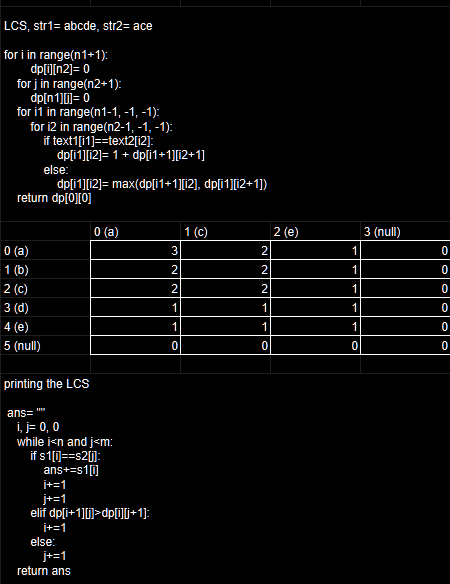

In [ ]:
# Longest common substring

# variation of LCS: use the same tabulation as LCS, just when we do not find a matching character we count it as 0 instead of the max(omitted combinations)
# as we are concerned with substrings we do not need to omit and check, we only check if it matches!

def longestCommonSubstr(s1, s2):
    n1, n2= len(s1), len(s2)
    dp= [[0] * (n2+1) for _ in range(n1+1)]
    for i in range(n1+1):
        dp[i][n2]= 0
    for j in range(n2+1):
        dp[n1][j]= 0
    ans= 0
    for i1 in range(n1-1, -1, -1):
        for i2 in range(n2-1, -1, -1):
            if s1[i1]==s2[i2]:
                dp[i1][i2]= 1 + dp[i1+1][i2+1]
                ans= max(ans, dp[i1][i2])
            else:
                dp[i1][i2]= 0
    return ans

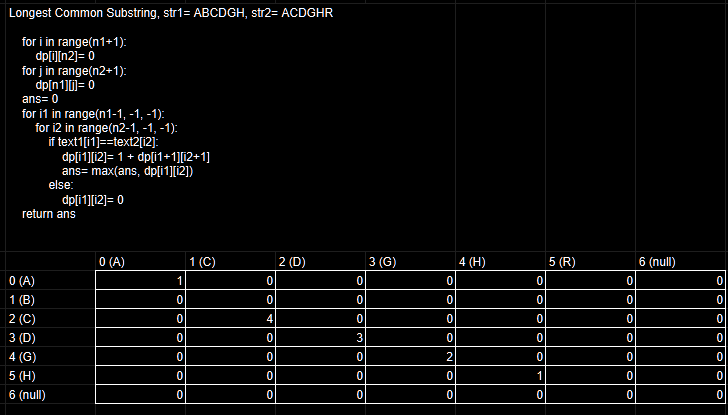

In [ ]:
# Longest Palindromic Subsequence

# variation of LCS: to get the longest palindromic subsequence in a string find its LCS with its reverse as a palindrome is always same when reversed!

def longestPalindromeSubseq(s: str) -> int:
    n1, n2= len(s), len(s)
    text1= s
    text2= s[::-1]
    dp= [[-1] * (n2+1) for _ in range(n1+1)]
    for i in range(n1+1):
        dp[i][n2]= 0
    for j in range(n2+1):
        dp[n1][j]= 0
    for i1 in range(n1-1, -1, -1):
        for i2 in range(n2-1, -1, -1):
            if text1[i1]==text2[i2]:
                dp[i1][i2]= 1 + dp[i1+1][i2+1]
            else:
                dp[i1][i2]= max(dp[i1+1][i2], dp[i1][i2+1])
    return dp[0][0]

In [ ]:
# Minimum insertions to make a string palindrome

# variation of LCS: to get the minimum insertions to make a string palindromic subsequence find its longest palindromic subsequence and we just need to add
# len of string - longest pakindromic subsequence length to make the string completed palindromic!

def minInsertions(s: str) -> int:
    n1, n2= len(s), len(s)
    text1= s
    text2= s[::-1]
    dp= [[-1] * (n2+1) for _ in range(n1+1)]
    for i in range(n1+1):
        dp[i][n2]= 0
    for j in range(n2+1):
        dp[n1][j]= 0
    for i1 in range(n1-1, -1, -1):
        for i2 in range(n2-1, -1, -1):
            if text1[i1]==text2[i2]:
                dp[i1][i2]= 1 + dp[i1+1][i2+1]
            else:
                dp[i1][i2]= max(dp[i1+1][i2], dp[i1][i2+1])
    return n1-dp[0][0]

In [ ]:
# Delete Operation for 2 strings

# variation of LCS: find LCS of the 2 strings and we just need to remove the remaining characters from both strings to make it equal

def minDistance(word1: str, word2: str) -> int:
    n1, n2= len(word1), len(word2)
    dp= [[-1] * (n2+1) for _ in range(n1+1)]
    for i in range(n1+1):
        dp[i][n2]= 0
    for j in range(n2+1):
        dp[n1][j]= 0
    for i1 in range(n1-1, -1, -1):
        for i2 in range(n2-1, -1, -1):
            if word1[i1]==word2[i2]:
                dp[i1][i2]= 1 + dp[i1+1][i2+1]
            else:
                dp[i1][i2]= max(dp[i1+1][i2], dp[i1][i2+1])
    return (n1-dp[0][0])+(n2-dp[0][0])

In [ ]:
# Shortest common supersequence

def shortestCommonSupersequence(str1: str, str2: str) -> str:
    n1, n2= len(str1), len(str2)
    dp= [[-1] * (n2+1) for _ in range(n1+1)]
    for i in range(n1+1):
        dp[i][n2]= 0
    for j in range(n2+1):
        dp[n1][j]= 0
    for i1 in range(n1-1, -1, -1):
        for i2 in range(n2-1, -1, -1):
            if str1[i1]==str2[i2]:
                dp[i1][i2]= 1 + dp[i1+1][i2+1]
            else:
                dp[i1][i2]= max(dp[i1+1][i2], dp[i1][i2+1])
    
    ans= ""
    i, j= 0, 0
    while i<n1 and j<n2:
        if str1[i]==str2[j]:
            ans+=str1[i]
            i+=1
            j+=1
        elif dp[i+1][j]>dp[i][j+1]:
            ans+=str1[i]
            i+=1
        else:
            ans+=str2[j]
            j+=1
    while i<n1:
        ans+= str1[i]
        i+=1
    while j<n2:
        ans+= str2[j]
        j+=1
    return ans

In [ ]:
# Distinct Subsequences

def solve(i, j, s, t, dp):
    if j==len(t):
        return 1
    
    if i==len(s):
        return 0

    if dp[i][j]!=-1:
        return dp[i][j]

    if s[i]==t[j]:
        dp[i][j]= solve(i+1, j+1, s, t, dp) + solve(i+1, j, s, t, dp)
    else:
        dp[i][j]= solve(i+1, j, s, t, dp)
    
    return dp[i][j]

def numDistinct(s: str, t: str) -> int:
    n, m= len(s), len(t)
    dp= [[-1] * (m+1) for _ in range(n+1)]
    return solve(0, 0, s, t, dp)

In [ ]:
# tabulation

def numDistinct(s: str, t: str) -> int:
    n, m= len(s), len(t)
    dp= [[0] * (m+1) for _ in range(n+1)]
    for i in range(n+1):
        dp[i][m]= 1
    for i in range(n-1, -1, -1):
        for j in range(m-1, -1, -1):
            if s[i]==t[j]:
                dp[i][j]= dp[i+1][j+1] + dp[i+1][j]
            else:
                dp[i][j]= dp[i+1][j]
    return dp[0][0]

In [ ]:
# Edit Distance

def solve(i, j, w1, w2, dp):
    if i==len(w1) and j==len(w2):
        return 0

    if j==len(w2):
        return len(w1)-i

    if i==len(w1):
        return len(w2)-j

    if dp[i][j]!=-1:
        return dp[i][j]

    if w1[i]==w2[j]:
        dp[i][j]= solve(i+1, j+1, w1, w2, dp)
    else:
        insert= 1+solve(i, j+1, w1, w2, dp)
        delete= 1+solve(i+1, j, w1, w2, dp)
        replace= 1+solve(i+1, j+1, w1, w2, dp)
        dp[i][j]= min(insert, min(delete, replace))
    return dp[i][j]

def minDistance(word1: str, word2: str) -> int:
    n, m= len(word1), len(word2)
    dp= [[-1] * (m+1) for _ in range(n+1)]
    return solve(0, 0, word1, word2, dp) 

In [ ]:
# tabulation

def minDistance(word1: str, word2: str) -> int:
    n, m= len(word1), len(word2)
    dp= [[0] * (m+1) for _ in range(n+1)]
    for i in range(n+1):
        dp[i][m]= n-i
    for j in range(m+1):
        dp[n][j]= m-j
    for i in range(n-1, -1, -1):
        for j in range(m-1, -1, -1):
            if word1[i]==word2[j]:
                dp[i][j]= dp[i+1][j+1]
            else:
                insert= 1+dp[i][j+1]
                delete= 1+dp[i+1][j]
                replace= 1+dp[i+1][j+1]
                dp[i][j]= min(insert, min(delete, replace))
    return dp[0][0]

### DP on Stocks

In [ ]:
# Best time to buy and sell stocks

# technically not a dp problem but is an imp one

def maxProfit(prices: List[int]) -> int:
    n= len(prices)
    maxi= 0
    mini= prices[0]
    for i in range(1, n):
        profit= prices[i]-mini
        maxi= max(maxi, profit)
        mini= min(mini, prices[i])
    return maxi

In [ ]:
# best time to buy and sell stocks II

# recurrence

def solve(i, b, prices):
    if i==len(prices):
        return 0
    profit= 0
    if b==1:
        buy, notBuy= 0, 0
        buy= -prices[i] + solve(i+1, 0, prices)
        notBuy= solve(i+1, 1, prices)
        profit= max(buy, notBuy)
    else:
        sell= prices[i] + solve(i+1, 1, prices)
        notSell= solve(i+1, 0, prices)
        profit= max(sell, notSell)
    return profit
def maxProfit(prices: List[int]) -> int:
    return solve(0, 1, prices)

In [ ]:
# memoization

def solve(i, b, prices, dp):
    if i==len(prices):
        return 0
    if dp[i][b]!=-1:
        return dp[i][b]
    profit= 0
    if b==1:
        buy, notBuy= 0, 0
        buy= -prices[i] + solve(i+1, 0, prices, dp)
        notBuy= solve(i+1, 1, prices, dp)
        profit= max(buy, notBuy)
    else:
        sell= prices[i] + solve(i+1, 1, prices, dp)
        notSell= solve(i+1, 0, prices, dp)
        profit= max(sell, notSell)
    dp[i][b]= profit
    return dp[i][b]
def maxProfit(prices: List[int]) -> int:
    n= len(prices)
    dp= [[-1] * 2 for _ in range(n+1)]
    return solve(0, 1, prices, dp)

In [ ]:
# tabulation

def maxProfit(prices: List[int]) -> int:
    n= len(prices)
    dp= [[0] * 2 for _ in range(n+1)]
    for i in range(n-1, -1, -1):
        for b in range(2):
            profit= 0
            if b==1:
                buy, notBuy= 0, 0
                buy= -prices[i] + dp[i+1][0]
                notBuy= dp[i+1][1]
                profit= max(buy, notBuy)
            else:
                sell= prices[i] + dp[i+1][1]
                notSell= dp[i+1][0]
                profit= max(sell, notSell)
            dp[i][b]= profit
    return dp[0][1]

In [ ]:
# space optimization

def maxProfit(prices: List[int]) -> int:
    n= len(prices)
    prev= [0, 0]
    curr= [0, 0]
    for i in range(n-1, -1, -1):
        curr= [0, 0]
        for b in range(2):
            profit= 0
            if b==1:
                buy, notBuy= 0, 0
                buy= -prices[i] + prev[0]
                notBuy= prev[1]
                profit= max(buy, notBuy)
            else:
                sell= prices[i] + prev[1]
                notSell= prev[0]
                profit= max(sell, notSell)
            curr[b]= profit
        prev= curr
    return curr[1]

In [ ]:
# Best time to buy and sell stocks III

# recursion

def solve(i, b, cnt, prices):
    if i==len(prices) or cnt==2:
        return 0
    profit= 0
    if b==1:
        buy, notBuy= 0, 0
        buy= -prices[i] + solve(i+1, 0, cnt, prices)
        notBuy= solve(i+1, 1, cnt, prices)
        profit= max(profit, max(buy, notBuy))
    else:
        sell, notSell= 0, 0
        sell= prices[i] + solve(i+1, 1, cnt+1, prices)
        notSell= solve(i+1, 0, cnt, prices)
        profit= max(profit, max(sell, notSell))
    return profit

def maxProfit(prices: List[int]) -> int:
    return solve(0, 1, 0, prices)

In [ ]:
# memoization

def solve(i, b, cnt, prices, dp):
    if i==len(prices) or cnt==2:
        return 0

    if dp[i][b][cnt]!=-1:
        return dp[i][b][cnt]

    profit= 0
    if b==1:
        buy, notBuy= 0, 0
        buy= -prices[i] + solve(i+1, 0, cnt, prices, dp)
        notBuy= solve(i+1, 1, cnt, prices, dp)
        profit= max(profit, max(buy, notBuy))
    else:
        sell, notSell= 0, 0
        sell= prices[i] + solve(i+1, 1, cnt+1, prices, dp)
        notSell= solve(i+1, 0, cnt, prices, dp)
        profit= max(profit, max(sell, notSell))
    dp[i][b][cnt]= profit
    return dp[i][b][cnt]

def maxProfit(prices: List[int]) -> int:
    n= len(prices)
    dp= [[[-1] * 3 for _ in range(2)] for _ in range(n+1)]
    return solve(0, 1, 0, prices, dp)

In [ ]:
# tabulation

def maxProfit(prices: List[int]) -> int:
    n= len(prices)
    dp= [[[0] * 3 for _ in range(2)] for _ in range(n+1)]
    for i in range(n-1, -1, -1):
        for b in range(2):
            for cnt in range(1, -1, -1):
                profit= 0
                if b==1:
                    buy, notBuy= 0, 0
                    buy= -prices[i] + dp[i+1][0][cnt]
                    notBuy= dp[i+1][1][cnt]
                    profit= max(profit, max(buy, notBuy))
                else:
                    sell, notSell= 0, 0
                    sell= prices[i] + dp[i+1][1][cnt+1]
                    notSell= dp[i+1][0][cnt]
                    profit= max(profit, max(sell, notSell))
                dp[i][b][cnt]= profit
    return dp[0][1][0]

In [ ]:
# Best time to buy and sell stocks IV

def maxProfit(k: int, prices: List[int]) -> int:
    n= len(prices)
    dp= [[[0] * (k+1) for _ in range(2)] for _ in range(n+1)]
    for i in range(n-1, -1, -1):
        for b in range(2):
            for cnt in range(k-1, -1, -1):
                profit= 0
                if b==1:
                    buy, notBuy= 0, 0
                    buy= -prices[i] + dp[i+1][0][cnt]
                    notBuy= dp[i+1][1][cnt]
                    profit= max(profit, max(buy, notBuy))
                else:
                    sell, notSell= 0, 0
                    sell= prices[i] + dp[i+1][1][cnt+1]
                    notSell= dp[i+1][0][cnt]
                    profit= max(profit, max(sell, notSell))
                dp[i][b][cnt]= profit
    return dp[0][1][0]

In [ ]:
# Best time to buy and sell stock with cooldown

def maxProfit(prices: List[int]) -> int:
    n= len(prices)
    dp= [[0] * 2 for _ in range(n+1)]
    for i in range(n-1, -1, -1):
        for b in range(2):
            profit= 0
            if b==1:
                buy, notBuy= 0, 0
                buy= -prices[i] + dp[i+1][0]
                notBuy= dp[i+1][1]
                profit= max(buy, notBuy)
            else:
                sell, notSell= 0, 0
                sell= prices[i]
                if i+2<=n:
                    sell+= dp[i+2][1]
                notSell= dp[i+1][0]
                profit= max(sell, notSell)
            dp[i][b]= profit
    return dp[0][1]

In [ ]:
# Best time to buy and sell stocks with transaction fee

def maxProfit(prices: List[int], fee: int) -> int:
    n= len(prices)
    dp= [[0] * 2 for _ in range(n+1)]
    for i in range(n-1, -1, -1):
        for b in range(2):
            profit= 0
            if b==1:
                buy, notBuy= 0, 0
                buy= -prices[i] + dp[i+1][0] - fee
                notBuy= dp[i+1][1]
                profit= max(buy, notBuy)
            else:
                sell, notSell= 0, 0
                sell= prices[i] + dp[i+1][1]
                notSell= dp[i+1][0]
                profit= max(sell, notSell)
            dp[i][b]= profit
    return dp[0][1]